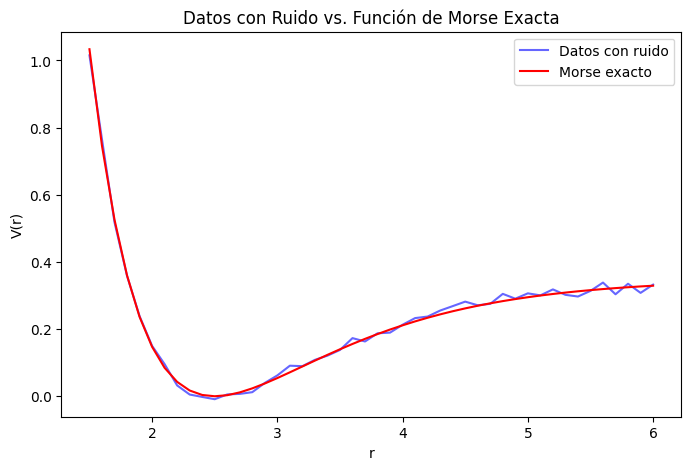

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Dense #type: ignore


def morsepotential(q, D, alpha, E0, R_eq):
    return D*(1.0 - np.exp(-alpha*(q-R_eq)))**2 + E0


r_values = np.linspace(1.5, 6.0, 46) #qvec


# Agregamos ruido gaussiano
#ruido = np.random.normal(scale=0.01)  # Ajusta la escala según necesites

ruido = 0.025*(np.random.random(len(r_values))-np.random.random(len(r_values)))  # Ruido aleatorio entre -0.025 y 0.025)
V_noisy = morsepotential(r_values,0.35,1.0,0.0,2.5) + ruido

r_values_tf = tf.convert_to_tensor(r_values, dtype=tf.float32)
V_noisy_tf = tf.convert_to_tensor(V_noisy, dtype=tf.float32)

plt.figure(figsize=(8, 5))
plt.plot(r_values, V_noisy, label="Datos con ruido", color='blue', alpha=0.6)
plt.plot(r_values, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=1.5)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Datos con Ruido vs. Función de Morse Exacta")
plt.show()

In [41]:
print(r_values)
print(V_noisy.shape)

#r_values.reshape(-1, 1)  # Cambia la forma de r_values para que sea un vector columna

[1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2
 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.
 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6. ]
(46,)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 90)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 90)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 90)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 90)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 50)             │         4,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,351 (114.65 KB)

 Trainable params: 29,351 (114.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 3/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0498 - mse: 0.0498 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 6/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 7/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 8/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 9/1500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.04

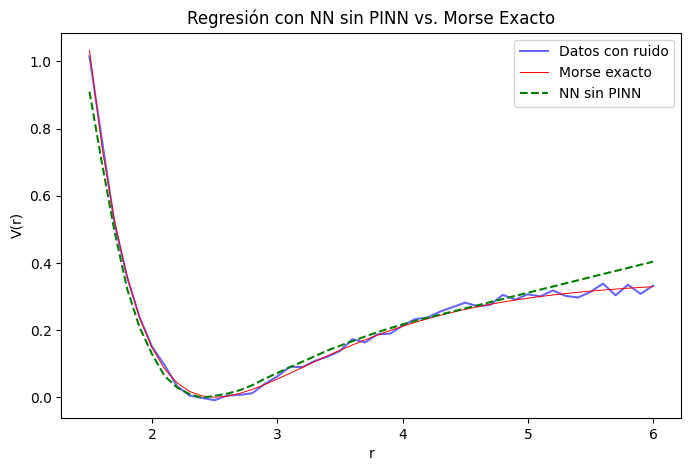

In [42]:
import tensorflow as tf
import keras.optimizers #type: ignore
from keras.models import Model #type: ignore
from keras.layers import Input, Dense #type: ignore

ep = 1500
pv = 0.2
opt = keras.optimizers.Adam(learning_rate=0.001)

inputs = Input(shape=(1,))

hidden1 = Dense(90, activation='relu')(inputs)
hidden2 = Dense(90, activation='relu')(hidden1)
hidden3 = Dense(90, activation='relu')(hidden2)
hidden4 = Dense(90, activation='relu')(hidden3)
hidden5 = Dense(50, activation='relu')(hidden4)

outputs = Dense(1, activation='linear')(hidden5)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])
model.summary()


#r_values es el target, pero necesito saber cual es el X
#Corregit batch size, verbose, early stopping
model.fit(r_values_tf,V_noisy_tf, epochs=ep, validation_split=pv,)

# Predicción con NN sin PINN
y_pred_nn = model.predict(r_values_tf)

plt.figure(figsize=(8, 5))
plt.plot(r_values_tf, V_noisy_tf, label="Datos con ruido", color='blue', alpha=0.6)
plt.plot(r_values_tf, morsepotential(r_values,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=0.7)
plt.plot(r_values_tf, y_pred_nn, label="NN sin PINN", color='green', linestyle='dashed')
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Regresión con NN sin PINN vs. Morse Exacto")
plt.show()


Epoch 1/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090
Epoch 2/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 
Epoch 3/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 
Epoch 4/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 5/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 
Epoch 6/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 
Epoch 7/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 
Epoch 8/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 
Epoch 9/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 
Epoch 10/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 
Epoch 11/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 
Epoch 12/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071 
Epoch 13/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 
Epoch 14/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 
Epoch 15/1200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 
Epoch

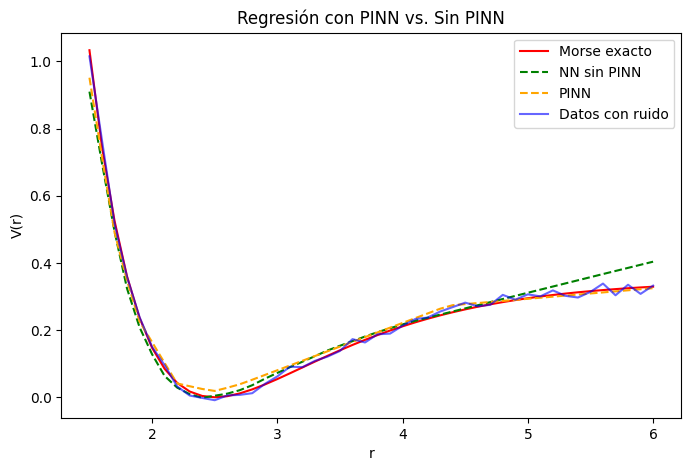

In [48]:
D = 0.35
alpha = 1.0
R_eq = 2.5
E0 = 0.0

#Si mse mse_loss funciona, el pinnloss es igual. Pero y_true no serian los datos de entrada
#los valores exactos del potencial de Morse
def custom_loss_PINN(V_noisy_tf, V_pred_nn):
    lossRi = D * (1.0 - tf.exp(-alpha * (r_values_tf - R_eq)))**2 + E0
    
    pinn_loss = tf.reduce_mean(tf.square(V_pred_nn - lossRi))
    mse_loss = tf.reduce_mean(tf.square(V_pred_nn - V_noisy_tf))

    lambda_pinn = 0.1
    total_loss = mse_loss + lambda_pinn * pinn_loss
    return total_loss


history = model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=custom_loss_PINN)
model.fit(r_values_tf, V_noisy_tf, epochs=1200)

y_pred_pinn = model.predict(r_values_tf)

# Graficar comparación NN sin PINN vs. PINN
plt.figure(figsize=(8, 5))
plt.plot(r_values_tf, morsepotential(r_values_tf,0.35,1.0,0.0,2.5), label="Morse exacto", color='red', linewidth=1.5)
plt.plot(r_values_tf, y_pred_nn, label="NN sin PINN", color='green', linestyle='dashed')
plt.plot(r_values_tf, y_pred_pinn, label="PINN", color='orange', linestyle='dashed')
plt.plot(r_values_tf, V_noisy_tf, label="Datos con ruido", color='blue', alpha=0.6)
plt.xlabel("r")
plt.ylabel("V(r)")
plt.legend()
plt.title("Regresión con PINN vs. Sin PINN")
plt.show()
